# Linear Programming in Python
## Tom Keefe
## 2016-11-21

## Problem setup

This problem comes from _Data Smart_ by John Foreman.

We can produce two goods: guns and butter. Each gun gets us \$195. Each ton of butter gets us \$150.

We want to figure out how much of each good to produce to maximize profit. But, we have some constraints. 

Budget:
* We have an \$1800 budget that goes toward production costs.
* Guns cost \$150 to make, a ton of butter costs \$100.

Storage:
* We also have to store the product before it's sold, and we have 21 cubic meters of storage space.
* Guns take up 0.5 cubic meters, a ton of butter is 1.5 cubic meters.



Let's make this a little more formal:

#### Decision variables:

Number of guns to produce, $g$, tons of butter to produce $b$.

#### Objective function:
Maximize $195g + 150b$

#### Constraints:
Budget constraint: $150g + 100b <= 1800$

Storage constraint: $0.5g + 1.5b <= 21$


Notice that the constraints are linear inequalities, and the objective is a linear expression. Let's graph them!

In [102]:
import matplotlib.pyplot as plt
%matplotlib inline

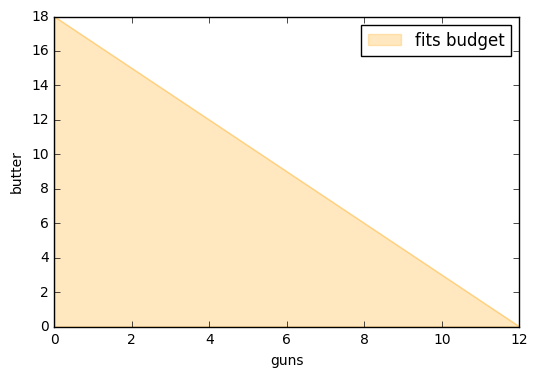

In [103]:
plt.figure()
    
# Budget constraint
plt.plot([0, 1800/150], [1800/100, 0], color='orange', alpha=0.25)
plt.fill_between([0,1800/150], [1800/100,0], color='orange', alpha=0.25, label='fits budget')

plt.xlabel('guns')
plt.ylabel('butter')
plt.legend()
plt.show()

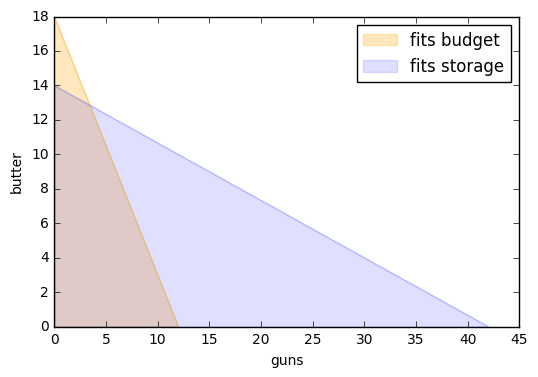

In [104]:
plt.figure()
    
# Budget constraint
plt.plot([0, 1800/150], [1800/100, 0], color='orange', alpha=0.25)
plt.fill_between([0,1800/150], [1800/100,0], color='orange', alpha=0.25, label='fits budget')

# Storage constraint
plt.plot([0, 21/0.5], [21/1.5, 0], color='blue', alpha=0.125)
plt.fill_between([0, 21/0.5], [21/1.5, 0], color='blue', alpha=0.125, label='fits storage')

plt.xlabel('guns')
plt.ylabel('butter')
plt.legend()
plt.show()

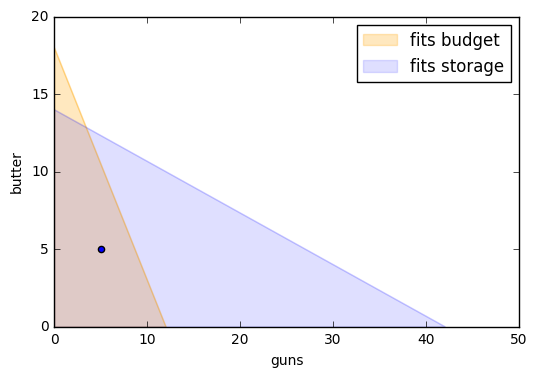

In [105]:
plt.figure()
    
# Budget constraint
plt.plot([0, 1800/150], [1800/100, 0], color='orange', alpha=0.25)
plt.fill_between([0,1800/150], [1800/100,0], color='orange', alpha=0.25, label='fits budget')

# Storage constraint
plt.plot([0, 21/0.5], [21/1.5, 0], color='blue', alpha=0.125)
plt.fill_between([0, 21/0.5], [21/1.5, 0], color='blue', alpha=0.125, label='fits storage')

plt.xlabel('guns')
plt.ylabel('butter')

plt.scatter([5], [5])  # a feasible point

plt.xlim(0)
plt.ylim(0)

plt.legend()
plt.show()

Revenue = $195 * 5 + 150 * 5 = 1725$



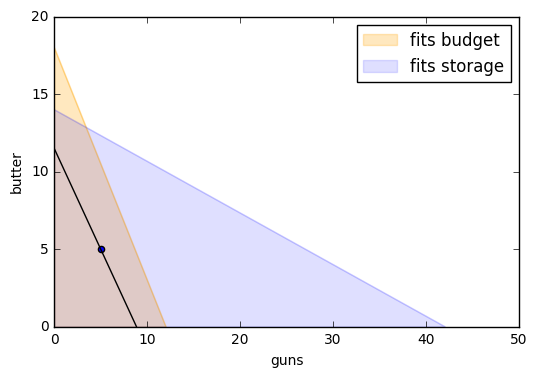

In [106]:
plt.figure()
    
# Budget constraint
plt.plot([0, 1800/150], [1800/100, 0], color='orange', alpha=0.25)
plt.fill_between([0,1800/150], [1800/100,0], color='orange', alpha=0.25, label='fits budget')

# Storage constraint
plt.plot([0, 21/0.5], [21/1.5, 0], color='blue', alpha=0.125)
plt.fill_between([0, 21/0.5], [21/1.5, 0], color='blue', alpha=0.125, label='fits storage')

plt.xlabel('guns')
plt.ylabel('butter')

plt.scatter([5], [5])

plt.plot([0, 1725.0/195], [1725.0/150, 0], color='black')

plt.xlim(0)
plt.ylim(0)

plt.legend()
plt.show()

In [107]:
import ipywidgets

In [108]:
def plot_frontier(revenue):
    plt.figure()
    
    # Budget constraint
    plt.plot([0, 1800/150], [1800/100, 0], color='orange', alpha=0.25)
    plt.fill_between([0,1800/150], [1800/100,0], color='orange', alpha=0.25, label='fits budget')

    # Storage constraint
    plt.plot([0, 21/0.5], [21/1.5, 0], color='blue', alpha=0.125)
    plt.fill_between([0, 21/0.5], [21/1.5, 0], color='blue', alpha=0.125, label='fits storage')

    # Revenue line
    a = revenue/195.0
    b = revenue/150.0
    plt.plot([0, a], [b, 0], color='black')

    plt.legend()
    plt.show()

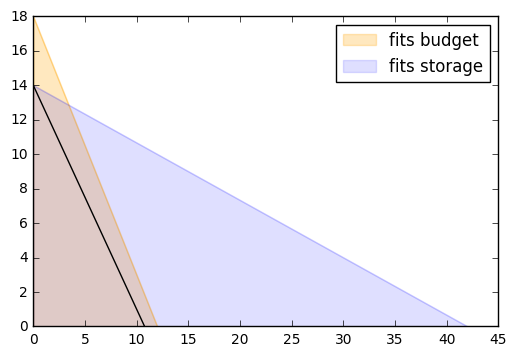

In [109]:
interact(plot_frontier, revenue=widgets.IntSlider(min=0, max=5000, step=100, value=1500));

You will always exit the feasible region via a corner. So check all the corners!

This is the basis of the **Simplex** algorithm for solving LPs.

The linear programming library in Python is PuLP. It provides an object oriented interface to system-level solving routines.

In [110]:
import pulp

In [111]:
# Create problem object

problem = pulp.LpProblem("Guns and Butter", pulp.LpMaximize)

In [112]:
# Define decision variables

guns = pulp.LpVariable("guns", 0, None, pulp.LpInteger)
butter = pulp.LpVariable("butter", 0, None)

In [113]:
revenue = {'guns': 195, 'butter': 150}
cost =    {'guns': 150, 'butter': 100}
storage = {'guns': 0.5, 'butter': 1.5}

In [114]:
# Add objective function to the problem object

problem += guns*revenue['guns'] + butter*revenue['butter']

In [115]:
# Add constraints

problem += guns*cost['guns'] + butter*cost['butter'] <= 1800, "Budget constraint"
problem += guns*storage['guns'] + butter*storage['butter'] <= 21, "Storage constraint"

In [116]:
# Solve the problem. (Behind the scenes, PuLP passes the problem to a system-level solver.)

problem.solve()

1

In [117]:
# This just tells us that the return code '1' means we found the optimal solution.

pulp.LpStatus[problem.status]

'Optimal'

In [118]:
# Use .value() to get the optimized value from the decision variable.

guns.value()

4.0

In [119]:
butter.value()

12.0

In [121]:
problem.objective.value()

2580.0